# <center>Applied Data Science Capstone Project:</center>
## <center>Finding an appropriate place to live in London</center>
### <center>Mario Andrés González Pozo</center>

# 1. Business Problem

Nowadays it's common that people migrate from it's native region, either inside or outside their country, with various motives like studying abroad, work related, certain benefits associated with an area, "living the dream", long holidays or mere pleasure. The process of selecting the appropriate place to live is tedious and sometimes the deicision is taken leaving aside many characteristics of a place.

To facilitate the process of decision making related to choosing a new place to live, a model will be developed. The model will be implemented specifically for person who wants to move to London (very bounded, yes), considering important part of the resident population (up to 50% approximately for some boroughs) was born abroad.

The model can be considered as a prototype for a generalized model for people who wants to move to other parts of the world (not just London), needing for that a proper database, which is a fundamental limitation. It must be noted that the model would need some changes in case it needs to be generalized, specifically in the way the data is read from the external database and somehow automate the cluster analysis or let the user figure the clusters, which is harder. 

Taking into account a person needs and preferences, is there a way to facilitate relevant information that helps taking a better decision of where to move (within London)?

# 2. Data

The model considers economic, demographic and certain miscellaneous but meaningful aspects. Foursquare will play a complementary role by displaying the data of venues of interest for a person.

I. The data to be used is based on economic and demographic (and miscellaneous) data from each borough of London, obtaining the data from London Borough Profiles, provided by Greater London Authority (see: https://data.london.gov.uk/dataset/london-borough-profiles), offering a complete dataset for London on an Excel file. Depending on the data, it's updated to year 2011 being the most recent data from year 2017, and they are based on different sources like GLA, ONS, 2011 Census and other England organizations. The dataset has much more data that the one required, for example:
    
 - Average Public Transport Accessibility score (2014)
 - Male life expectancy (2012/14)
 - Anxiety score (2011/14)
 - Crime rates per thousand population (2014/15)
 - Jobs Density (2015)
 - Median House Price (2015)
 
 
II. The other part of the data is directly obtained from Foursquare API based on the different locations. The data of interest are the venues around each location which can characterize a place and must match the user preferences. Foursquare, as you may (should) know is able to show the data about venues located around certain point on the world map. This allows, for example, to calculate the frequency of certain type of venues within a range (radius) of a location, and characterize a location given the most common venues.

# 3. Methodology

#### 3.1 Exploratory phase
The exploratory phase consist of the review of the data of London Boroughs Profiles to achieve the building of an adequate dataset to work on cluster analysis. 

A first part was made by preprocessing the data manually on an Excel file to convert it on a .csv file later, making it easier to read on Python. Some field/column names were changed to obtain a consistent format and making it a little easier to handle while programming.

There are many parameters/fields in the original file, so the first thing to do is select the ones that are relevant to characterize a borough cluster. 

##### The following fields were chosen to work with (update year within parenthesis):
- Population density (2017): Measured as the population per hectare.
- Average population age (2017): Measured in years.
- Proportion of population of working-age (2015): Working-age referred as age between 16-64 years included.
- Percentage of resident population born abroad (2015): This doesn't include migrants which has spent less than a year in UK.
- Unemployment rate (2015): Proportion of aged 16 or more who are unemployed.
- Male employment rate (2015): Measured as percentage.
- Female employment rate (2015): Measured as percentage.
- Gross Annual Pay (2016): Measured as the median for full time workers in £/year.
- Jobs density (2015): Number of jobs per resident of working age.
- Two-year business survival rates (started in 2013): As percentage.
- Crime rates per thousand population (2014/15)
- Median house price (2015): Measured in £.
- Percentage of area that is greenspace (2005).

##### The following fields were considered interesting but not used in the analysis:
- Fields like *happiness score, life satisfaction score and anxiety score* could have been interesting to take into account for this model, but given that  they are homogeneous in London, they are not considered. 
- Another fields which weren't considered are *Gross Annual Pay for male and for female* (separately), because many values were missing. An inequality gross annual pay by gender could've been obtained by transforming both fields.

##### The following region was removed:
- The **City of London** is at the center of London, and it won't be part of the analysis (not because it's not a borough), but because there is an important lack of data for this region within the database.

##### The following missing values were replaced:
- Kensington and Chelsea - Gross Annual Pay was estimated to be around £39.500 based on "Earnings by Place of Residence, Borough" for the year 2016 (see: https://data.london.gov.uk/dataset/earnings-place-residence-borough)

##### The following statistics were obtained from the data (See Figure 1):

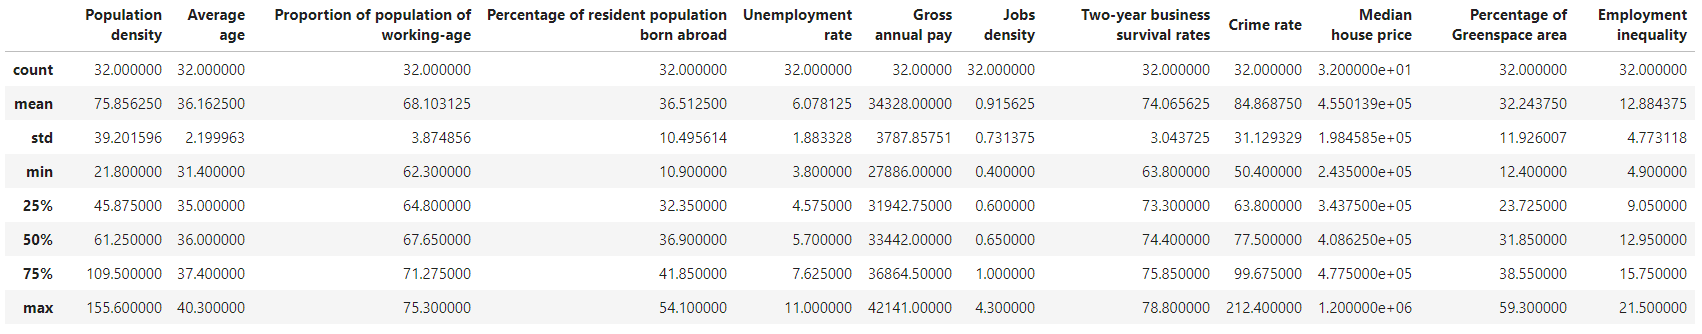

**Figure 1:** Descriptive statistics of the London Borough Profiles data.

##### The following values were considered as outliers:
- The *crime rate* for Westminster
- The *median house price* for Kensington and Chelsea
- The *jobs density* for Westminster

It was verified that these outliers were actually the real values by using other sources, hence it was opted to keep them.

##### Correlation analysis
A pairwise correlation was executed for every variable chosen from London Borough Profiles giving the next result:

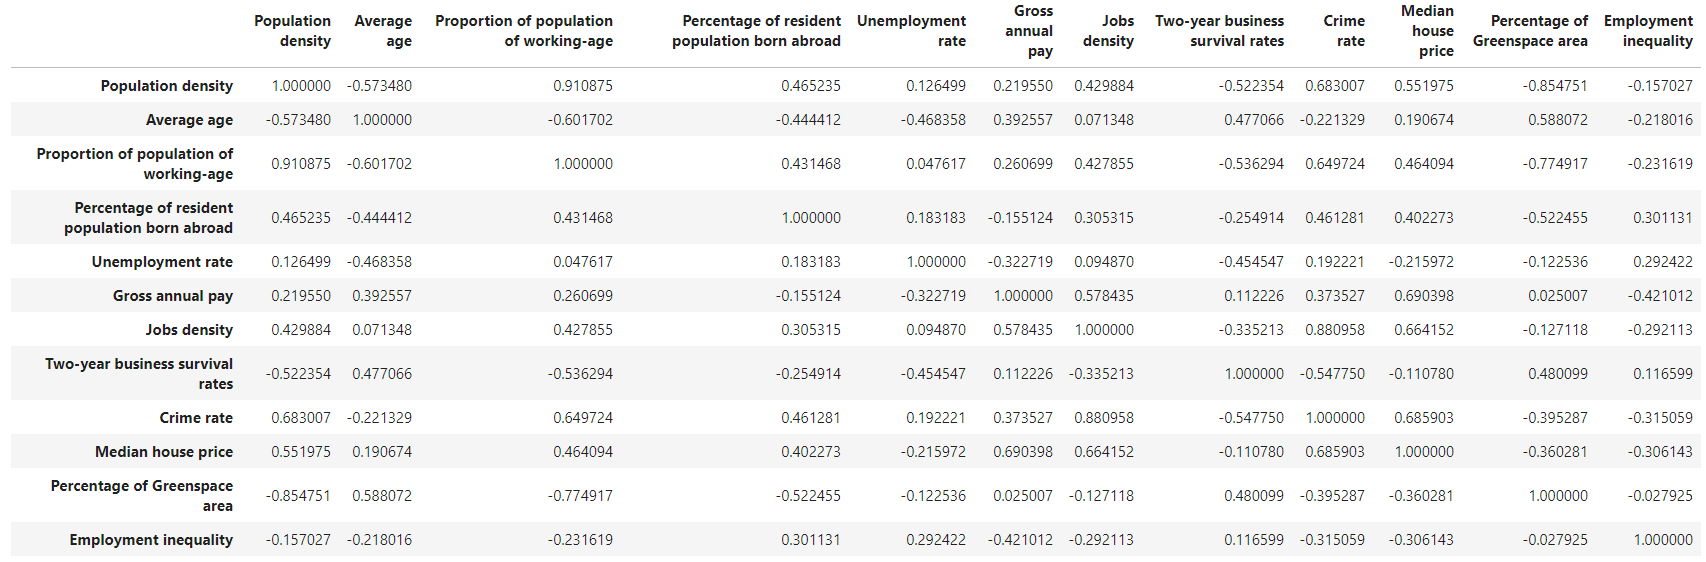

There are a couple variables which have a considerable correlation like *median house price* vs *gross annual pay* and *median house price* vs *crime rate*, the first being more intuitive, but they are kept as they given the different information they provide.

There is a great correlation between *proportion of population of working-age* and *population density* (See Figure 2). It was decided that the "proportion" was going to be removed considering that the correlation between both variables by themselves are similar respect to the other variables, and that the average age gives partial information about the proportion of population of working-age, presenting a negative correlation.


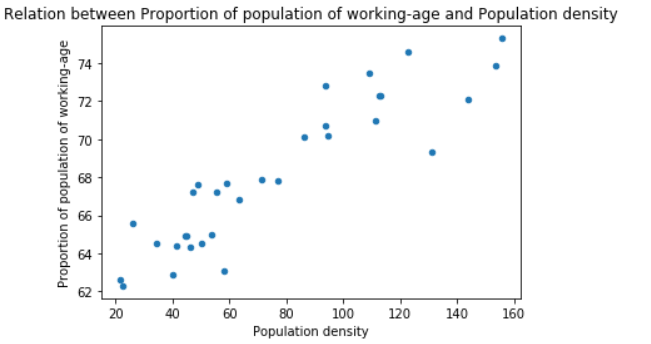

**Figure 2:** Verifying correlation between the proportion of population of working-age and Population density

##### A peek into the data until now shows the following (See Figure 3):

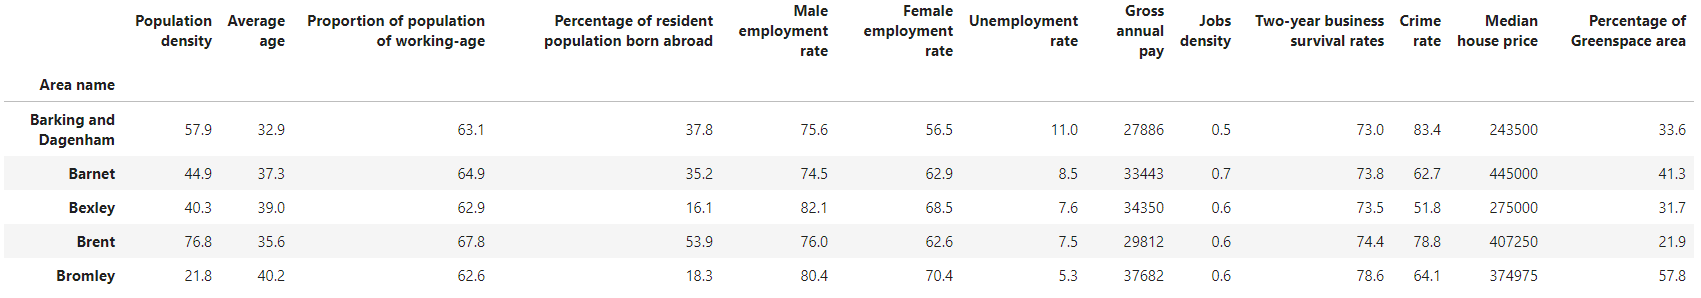

**Figure 3:** 5 first rows of the dataframe in process.

##### Data transformation
This includes the merge of two variables into a new one and the standardization of the data.
The variables that are transformed are *Male and Female employment rate*, since we already have an unemployment variable which gives a similar information. Both variables are transformed by difference (Male-Female), obtaining a new variable denominated *Employment inequality* which represents, logically, the magnitude of the breach between the employment rate of both genders.
As a last step before starting to cluster, the whole data is normalized using the standard scaler, which is recommended for cluster analysis in order to get a better model, since it takes into account both mean and variance of the data. 

##### Forming the clusters
The different boroughs are clustered by using KMeans function from scikit-learn and characterized manually using an iterative process for KMeans to get the better result. The method is used within a reasonable range of k values and they are analyzed logically to see if adding more clusters actually gives more value. Finally a value of k, and therefore a set of clusters is chosen to keep working with the model. Every borough is then labeled in a dataframe with its corresponding cluster. The mean of each cluster value is calculated (See Figure 4).

##### Foursquare in action
Once done, it's time to use Foursquare API to explore every borough, previously obtaining their location. The venues will be classified with their type (such as Coffe, Bar, Park, Hotel, etc.) and using their frequency a descending order dataframe will be created, showing the top common venues for each borough. A radius of 7km was chosen to look for venues, considering that it would take at most 20 min to go to a common venue (on vehicle). It must be taken into account that every borough is limited to 100 venues, so a big part of the info is lost in the process.

# 4. Results

A range of 4 to 7 clusters was considered to be reasonable to work with. Each of them were analyzed obtaining the following results identified by the number of clusters:

**4.1.  Clustering results** 

**4.1.1 Clusters for k = 4**

- Cluster A has a low population density which is relatively older and a few part of them are immigrants. The unemployment is low and could be related to a high business survival rate. Crime rates are low, income is low, and median house prices too but there is a high difference between the employment percentage of males and females (employment is higher for males). This cluster could be described as tranquil boroughs which have a stable but small economy probably having many natural and outdoor areas.

- Cluster B has younger people and a relatively high unemployment rate, low job density along with the lowest mean annual income, but having an according price for the houses. It also has a low business survival rate. Could be boroughs used for residential purposes.

- Cluster C has a high density of people of working age and a considerable percentage of immigrants. The unemployment is low and there isn't much difference between male and female employment rates. The jobs density is high and the income too, having high house prices. The crime rate is considerably higher. This cluster could be seen as an important economic region, probably an industrial or commercial area with many business/workplaces going on and large workforce.

- Cluster D corresponds to only 1 borough which is clearly different from the others, it has a very high job density and gross annual pay, has the highest migrant resident population, extremely high crime rate and highest median house price, with a great percentage of green areas.

**4.1.2.  Clusters for k = 5**

Cluster 0 from *k=4* iteration is divided into two groups which have their differences. **The other clusters are the same**.

- Cluster A1 is more similar than the cluster A defined previously but some features are more pronounced. The average age from these regions is relatively high and have a low population density of which just a few are immigrants. The job density is low, but the unemployment rate is also low, being similar for both genders. Description for the cluster would be tranquil boroughs  which have a stable but small economy, is inhabited by older people, and having many natural and outdoor areas.

- Cluster A2 seems to be another small and stable economy with low population density, having a great difference between employment rate between genders. Other features are average.

**4.1.3.  Clusters for k = 6**

- Cluster B from *k=4* iteration is divided into 2 new clusters. **The other clusters are kept the same**. The new clusters have some notorious difference, and seems like a reasonable division.

- Cluster B1 is characterized for having relatively young people and a relatively low income along with the lowest job density. This could be residential areas too that have small businesses.

- Cluster B2 has many immigrants and young people and very high unemployment. House prices are low, as well as income and job density. Overall, this cluster has boroughs with a relatively bad economy in global terms, i.e., in a sense of inequality where poverty coexist with a minority of people who has a good status. Given there is a low greenspace percentage, the area is probably associated with residential and commercial areas.

**4.1.4.  Clusters for k = 7**

This model returns 2 clusters with a single borough, and 3 with 3-4 boroughs, it's considered that the model is kind of overfitting the clusters, when a more general view is required. We stop at this point and consider k=6 as the number of clusters to use onwards.

**4.1.5. Final Clusters (k=6)**

Clusters to use are (from previous points): {A1, A2, B1, B2, C, D}


*Note that the cluster groups (index) may not correspond with the numbers given when the code is ran again. Clusters may don't even be the same, but generally they are the same groups with a different order.*

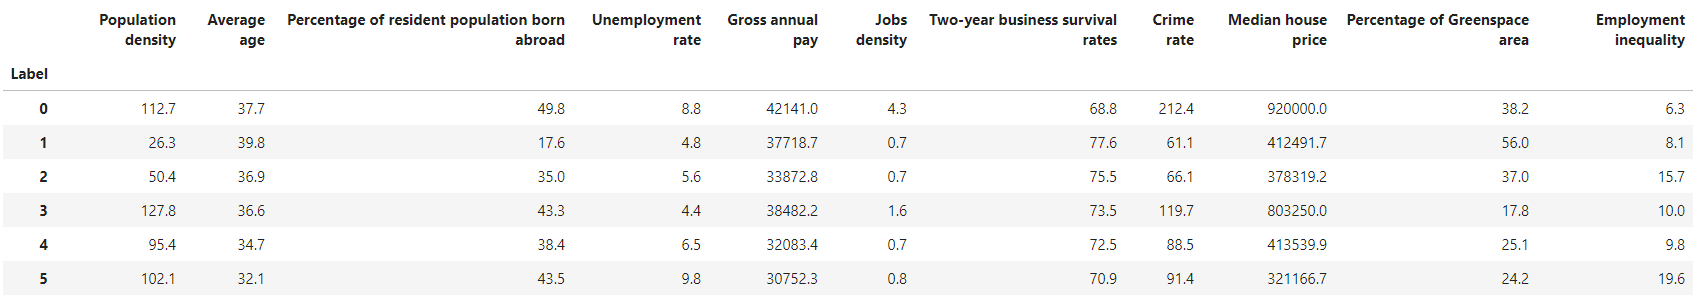

**Figure 4:** Mean values for cluster data (labeled without order).

**4.2. Foursquare and final results**

The location for each borough was obtained satisfactorily. It was verified that each borough has exactly 100 venues in the selected radius, and so the hunch of losing information. Anyway, 100 will be helpful to establish at least a vague idea of the boroughs venues. As an example, the venues for 5 boroughs are presented (See Figure 5):

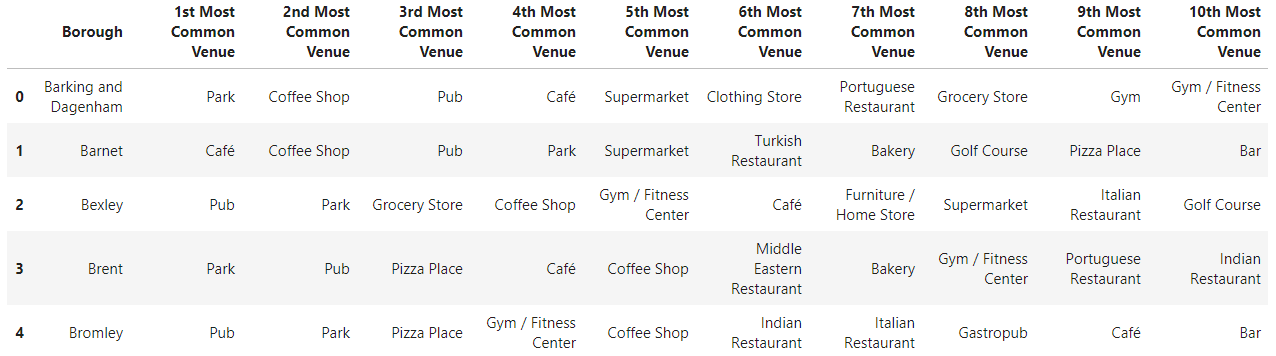

**Figure 5:** 5 first rows for common venues dataframe.

The model was tested for a specific case described below: 

Let's say we would like to move to London and have no idea where. We'll look through the clusters to get an idea of the types of boroughs inside London, and match what we want. We are interested in a tranquil borough with many green areas and kind of peaceful, also we won't be working, so we think that choosing **cluster A1** is a good alternative.
We would like to have some restaurants or food related venues nearby so we take a look at the boroughs belonging cluster A1 and their respective near common venues. So we take a look at the 3 different venues that matches the first set of constraints, to choose between a cluster that matches the preferences related to venues.

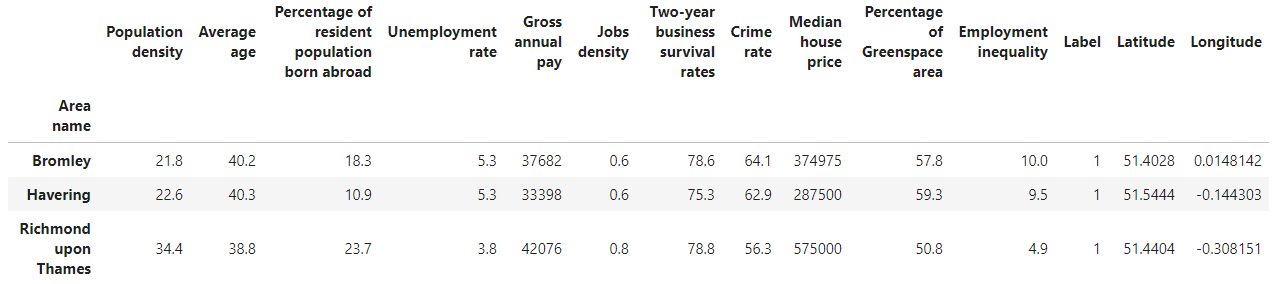

In this case, we could say that **Bromley** seems like a good candidate.

This is as far as the model can go as it is.

# Discussion

It must be cleared that the model doesn't provide an optimal solution to the requirements of a user. As it was declared initially we are concerned about the information display to help the decision making about moving to certain place.

Maybe a solution to automate the cluster making and, in this way, generalize the model to another places, is by using machine learning and certain criteria which leads to well defined clusters. This doesn't form part of the developed model considering its simplicity versus the complexity of training a machine learning model to think and discern which cluster is good or bad characterized (and the number of clusters to be used).

More data about the boroughs could've been useful too, to get a broader representation of a borough, like knowing what kind of economic activities are primarily performed, if it's commercially focused, residential area, a tourism area, etc.

The limit of getting 100 venues per borough at a time could also affect the model accuracy, since we are trying to encompass a wide area (whole borough), and possibly the lost of information is important to characterize each borough.

In some cases a radius of 7 km could surpass the limit of some boroughs and probably it would be better to take a smaller radius. A way to improve this could be by using a map which differentiates the boroughs (visually) and being aware of the magnitude of the borough measures. Posterior to identifying the magnitude of the radius that we want to use, we would need to change it on the nearby_venues definition or by using another variable. The opposite problem could also exist, where an area is bigger than the radius being used. Anyway, with a limit of 100 venues, this is not worth implementing.

# Conclusion

A prescriptive model was developed to help decision making of a person in need of readily available information about certain places.

The model is not automated, since we need to identify the clusters earlier, although this is enough given that we are only examining boroughs in London. That said, the utility of the model is very reduced since it only considers a unique city from a world with thousands of them, even when it was identified earlier that immigrates had a high population in some boroughs. A more useful model could even consider comparison between boroughs/areas that aren't in the same city or not even in the same country, but that would require a lot information and a way to automate the cluster generation as mentioned earlier.

It's clear that the model displays just a certain type of information that a person who's willing to move (to London or any place) would like to know.

The added value of the model is that it can summarize and process the data quickly, displaying only the important data to the user and letting him/her decide what would the best choice be given the knowledge that has been acquired once the program has ran. An upgrade could be to add a searching feature within the code, so that a user could know if a specific venue is present within range, and this way more relevant information could be acquired. Alternatively a user could just go to Foursquare page to verify that information, just to make sure the location chosen, aided by the model, is right.